## Example API usage

This notebooks provides a very quick example of API usage.

In [1]:
# Configuration Parameters
API_endpoint = "http://34.192.30.136"
image = "./example_image.jpeg"

### Image

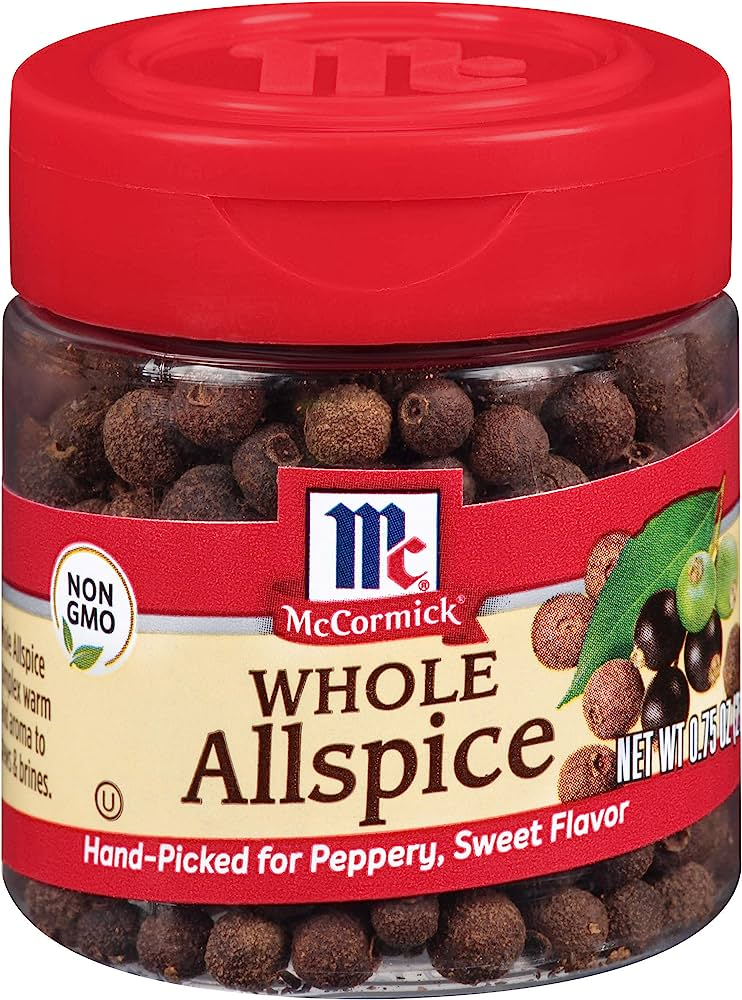

In [3]:
from IPython.display import Image, display
display(Image(filename=image))

## Submit Image to Image and OCR Prediction API

In [4]:
import requests
import json

predict_url = API_endpoint + "/predict"
with open (image, "rb") as fp:
    file_data = fp.read()

predict_api_response = requests.post( predict_url, files = { "file" : file_data} )

In [5]:
predict_api_response = json.loads( predict_api_response.text)
print (json.dumps(predict_api_response, indent=2))

{
  "prediction": "anise",
  "ocr_matches": [
    "chiles",
    "allspice",
    "salt"
  ],
  "ocr_all_results": [
    {
      "match": null,
      "text": "mccormick\"",
      "box": [
        [
          275,
          587
        ],
        [
          473,
          587
        ],
        [
          473,
          649
        ],
        [
          275,
          649
        ]
      ],
      "score": 0.5726515430141172
    },
    {
      "match": "cumin",
      "text": "(um",
      "box": [
        [
          17,
          681
        ],
        [
          57,
          681
        ],
        [
          57,
          725
        ],
        [
          17,
          725
        ]
      ],
      "score": 0.07813252566204895
    },
    {
      "match": "chiles",
      "text": "whole",
      "box": [
        [
          240,
          635
        ],
        [
          513,
          635
        ],
        [
          513,
          735
        ],
        [
          240,
         

### Convert into Recipe

In [6]:
recipe_url = API_endpoint + "/recipe"
spice = predict_api_response["prediction"] 
recipe_api_response = requests.post( recipe_url, json={ "spices" : [spice] } )


In [7]:
recipe_api_response = json.loads( recipe_api_response.text)
print (json.dumps(recipe_api_response, indent=2))

{
  "ingredients": [
    "2 tablespoons olive oil",
    "1/2 teaspoon anise seeds",
    "1/2 cup diced celery",
    "1/2 cup sliced mushrooms",
    "1/4 teaspoon garlic powder",
    "Salt and pepper to taste"
  ],
  "spices": [
    "anise",
    "celery",
    "mushroom"
  ],
  "title": "Mushroom and Celery Anise Stir Fry",
  "text": "Title: Mushroom and Celery Anise Stir Fry\nSpices: anise, celery, mushroom\nIngredients: 2 tablespoons olive oil, 1/2 teaspoon anise seeds, 1/2 cup diced celery, 1/2 cup sliced mushrooms, 1/4 teaspoon garlic powder, Salt and pepper to taste"
}
